# **Electricity bill Prediction**

This  dataset for predicting electricity bills based on various factors. Here's a breakdown of the columns:

1. Fan: Number of fans in use
2. Refrigerator: Number of refrigerators in use
3. AirConditioner: Number of air conditioners in use
4. Television: Number of televisions in use
5. Monitor: Number of monitors in use
6. MotorPump: Number of motor pumps in use
7. Month: Month of the year (1-12)
8. City: City or location
9. Company: Electricity company or provider
10. MonthlyHours: Total hours of usage per month
11. TariffRate: Electricity tariff rate
12. ElectricityBill: Target variable - total electricity bill for the month

This dataset can be used to train a machine learning model to predict electricity bills based on the usage patterns and other factors.

In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

**Load the dataset**


In [117]:
data=pd.read_csv("/content/electricity_bill_dataset.csv")


In [118]:
data

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,0,2,New Delhi,Orient Green,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


In [120]:
data.shape

(45345, 12)

Finding **duplicates**

In [121]:
data.duplicated().sum()

np.int64(0)

**No Duplicates found**

***Checking Null Values ***

In [122]:
data.isnull().sum()

,0
Fan,0
Refrigerator,0
AirConditioner,0
Television,0
Monitor,0
MotorPump,0
Month,0
City,0
Company,0
MonthlyHours,0


In [123]:

data.isnull().sum()/len(data)*100

,0
Fan,0.0
Refrigerator,0.0
AirConditioner,0.0
Television,0.0
Monitor,0.0
MotorPump,0.0
Month,0.0
City,0.0
Company,0.0
MonthlyHours,0.0


No Null Vlaues

In [124]:
# finding the value count of Motorpump
data["MotorPump"].value_counts()

,count
MotorPump,
0,45345


In [125]:
# Drop the column MotorPump since all values is zero.
data.drop(["MotorPump"],axis=1,inplace=True)


In [126]:
# Column Names
data.columns

Index(['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor',
       'Month', 'City', 'Company', 'MonthlyHours', 'TariffRate',
       'ElectricityBill'],
      dtype='object')

In [127]:
data['Monitor'].value_counts()

,count
Monitor,
1.0,36374
12.0,6149
7.0,2822


In [128]:
data.shape

(45345, 11)

In [129]:
data.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,12.000000,926.000000,9.300000,8286.300000


In [130]:
# Select Numerical Columns
data_num=data.select_dtypes("number")
data_num

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,457,9.2,4204.4
...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,9,764,7.9,6035.6
45341,23,23.0,2.0,6.0,12.0,2,572,8.5,4862.0
45342,22,22.0,2.0,20.0,1.0,1,609,8.5,5176.5
45343,8,21.0,2.0,22.0,7.0,12,748,7.4,5535.2


finding skewness

In [131]:
data_num.skew()

,0
Fan,0.002236
Refrigerator,-1.561662
AirConditioner,-0.006549
Television,0.001493
Monitor,1.735919
Month,-0.001201
MonthlyHours,0.006617
TariffRate,0.021143
ElectricityBill,0.116191


Here some insights of skewness:

*  Highly negatively skewed: Refrigerator (-1.561662)
Highly positively skewed: Monitor (1.735919)
Moderately positively skewed: ElectricityBill (0.116191)
Approximately symmetric: Fan, AirConditioner, Television, Month, MonthlyHours, and TariffRate

Plotting histplot and boxplot to find outlier

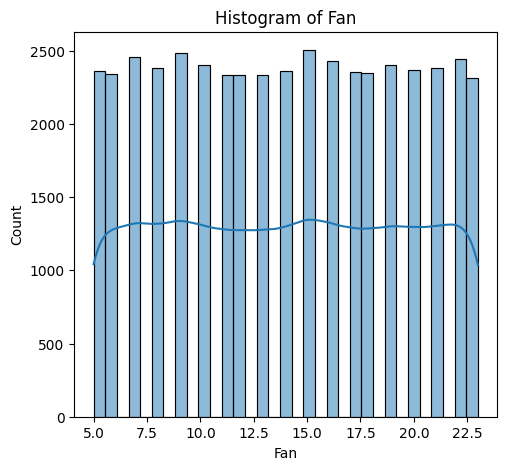

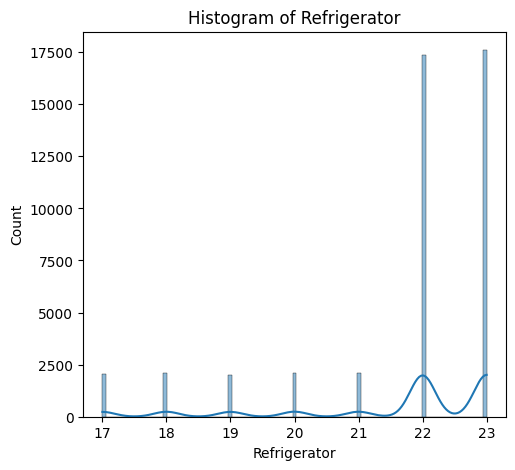

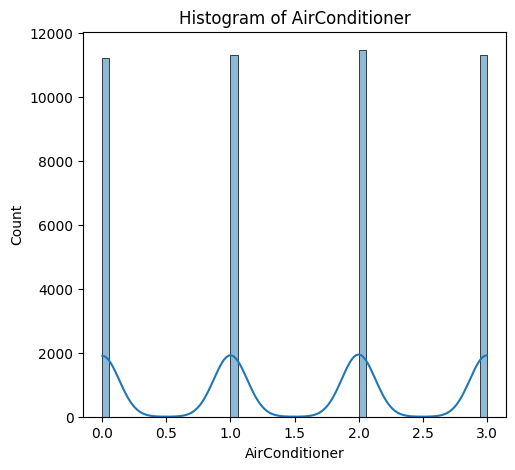

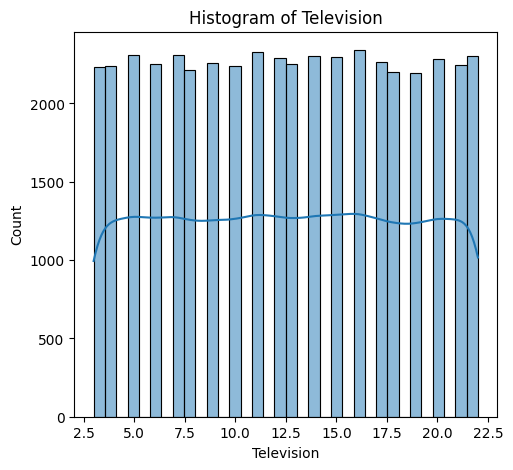

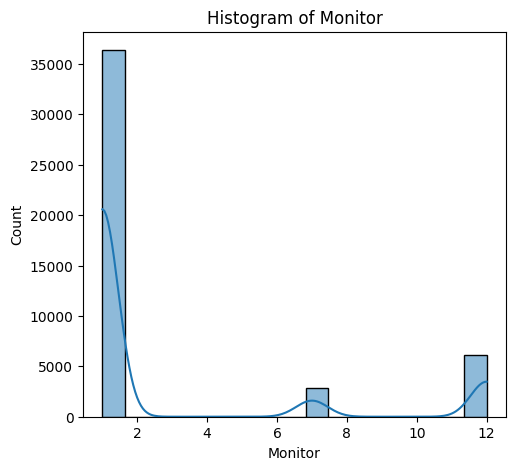

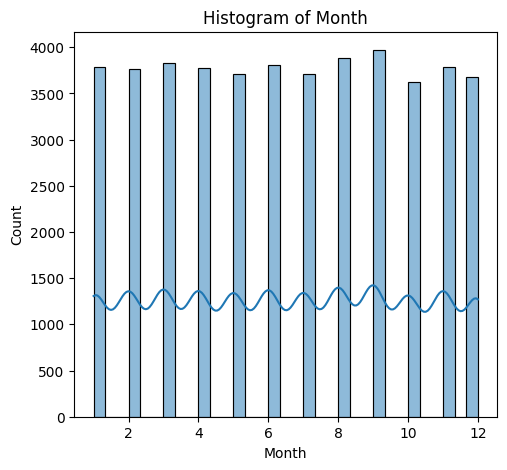

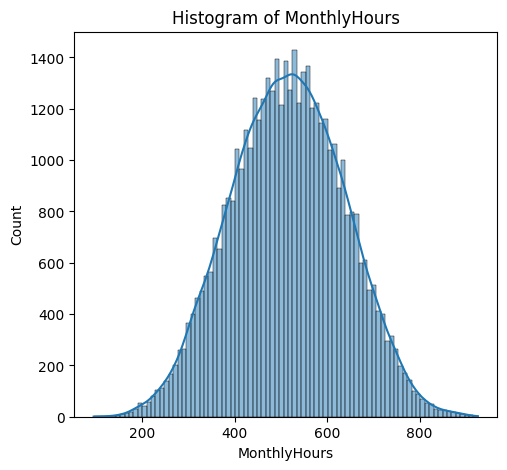

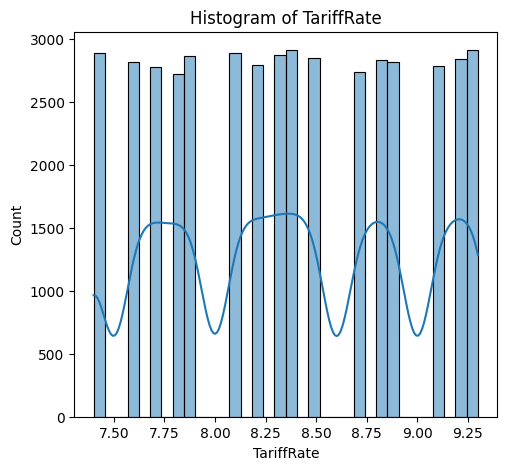

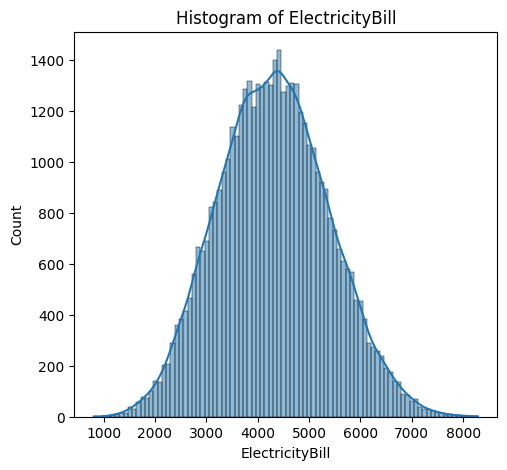

In [132]:
for column in data_num:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')


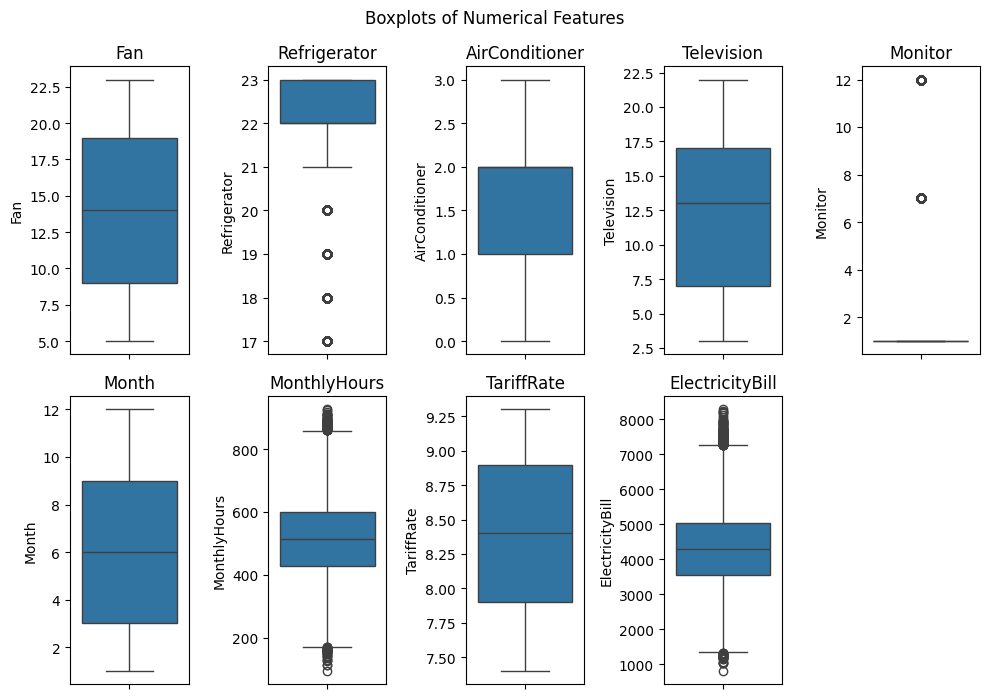

In [133]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

Found Outlier in Columns Refrigerator,Monthly Hours,Monitor and Electricity Bill

Clipping the outlier

In [134]:
q1=data["Refrigerator"].quantile(0.25)
q2=data["Refrigerator"].quantile(0.75)
iqr=q2-q1
lower=q1-iqr*1.5
upper=q2+iqr*1.5
data["Refrigerator"]=data["Refrigerator"].clip(lower,upper)

In [135]:
q1=data['MonthlyHours'].quantile(0.25)
q2=data['MonthlyHours'].quantile(0.75)
iqr=q2-q1
lower=q1-iqr*1.5
upper=q2+iqr*1.5
data['MonthlyHours']=data['MonthlyHours'].clip(lower,upper)

In [136]:
q1=data["ElectricityBill"].quantile(0.25)
q2=data["ElectricityBill"].quantile(0.75)
iqr=q2-q1
lower=q1-iqr*1.5
upper=q2+iqr*1.5
data["ElectricityBill"]=data["ElectricityBill"].clip(lower,upper)

**Bxplot after clipping the outlier**

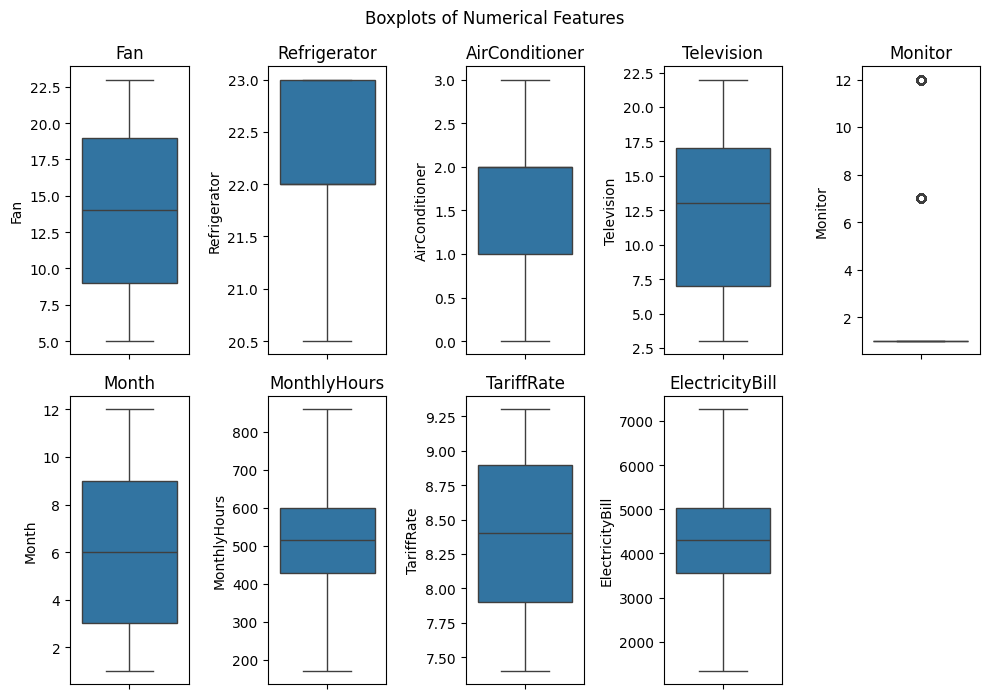

In [137]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

In [138]:
data.select_dtypes("number").skew()

,0
Fan,0.002236
Refrigerator,-0.579576
AirConditioner,-0.006549
Television,0.001493
Monitor,1.735919
Month,-0.001201
MonthlyHours,0.002205
TariffRate,0.021143
ElectricityBill,0.099590


recalculated the skewness values again.

Here's a summary:

  Highly positively skewed: Monitor (1.735919)
- Negatively skewed: Refrigerator (-0.579576)
- Positively skewed: ElectricityBill (0.099590)
- Approximately symmetric: Fan, AirConditioner, Television, Month, MonthlyHours, and TariffRate

The skewness values indicate that:

- Monitor is highly skewed to the right, suggesting a transformation might be necessary.
- Refrigerator is skewed to the left, but the skewness is not as extreme.
- ElectricityBill is slightly skewed to the right.



**Applying log to reduce skewness of the column Monitor**

In [139]:
data['Monitor_Log'] = np.log1p(data[ "Monitor"])
data

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,Monitor_Log
0,16,23.0,2.0,6.0,1.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,0.693147
1,19,22.0,2.0,3.0,1.0,5,Vadodara,NHPC,488,7.8,3806.4,0.693147
2,7,20.5,2.0,6.0,7.0,7,Shimla,Jyoti Structure,416,7.7,3203.2,2.079442
3,7,22.0,3.0,21.0,1.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,0.693147
4,11,23.0,2.0,11.0,1.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,1.0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6,0.693147
45341,23,23.0,2.0,6.0,12.0,2,New Delhi,Orient Green,572,8.5,4862.0,2.564949
45342,22,22.0,2.0,20.0,1.0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5,0.693147
45343,8,21.0,2.0,22.0,7.0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2,2.079442


In [140]:
data.drop('Monitor', axis=1, inplace=True)

Skewness after applying Transformation

In [141]:
data.select_dtypes("number").skew()

,0
Fan,0.002236
Refrigerator,-0.579576
AirConditioner,-0.006549
Television,0.001493
Month,-0.001201
MonthlyHours,0.002205
TariffRate,0.021143
ElectricityBill,0.099590
Monitor_Log,1.589528


**Exploratory Data Analysis(EDA)**

In [142]:
df=data

In [143]:
df.shape

(45345, 11)

In [144]:
df.describe()

,Fan,Refrigerator,AirConditioner,Television,Month,MonthlyHours,TariffRate,ElectricityBill,Monitor_Log
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,22.068343,1.503959,12.502635,6.488058,515.059610,8.369648,4310.990076,1.033247
std,5.470816,0.916656,1.115482,5.756007,3.443252,122.458189,0.576992,1071.089082,0.692138
min,5.000000,20.500000,0.000000,3.000000,1.000000,171.000000,7.400000,1333.800000,0.693147
25%,9.000000,22.000000,1.000000,7.000000,3.000000,429.000000,7.900000,3556.800000,0.693147
50%,14.000000,22.000000,2.000000,13.000000,6.000000,515.000000,8.400000,4299.400000,0.693147
75%,19.000000,23.000000,2.000000,17.000000,9.000000,601.000000,8.900000,5038.800000,0.693147
max,23.000000,23.000000,3.000000,22.000000,12.000000,859.000000,9.300000,7261.800000,2.564949


In [145]:
df.select_dtypes("number").skew()

,0
Fan,0.002236
Refrigerator,-0.579576
AirConditioner,-0.006549
Television,0.001493
Month,-0.001201
MonthlyHours,0.002205
TariffRate,0.021143
ElectricityBill,0.099590
Monitor_Log,1.589528


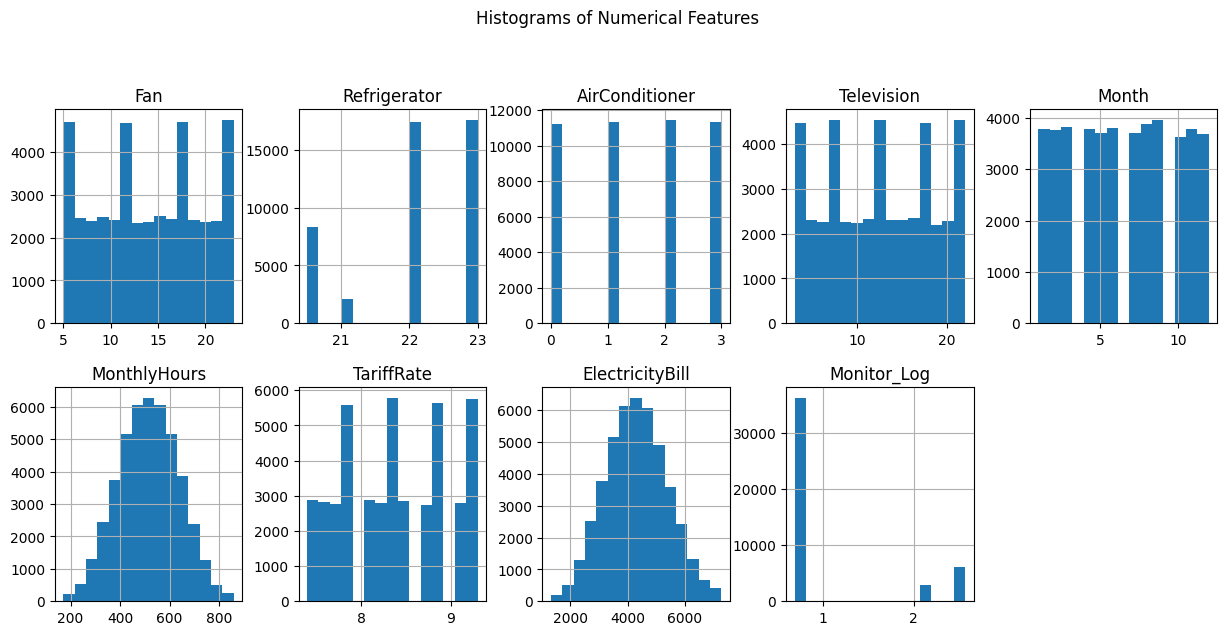

In [146]:
## 1. Histograms for all numerical features
df.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()


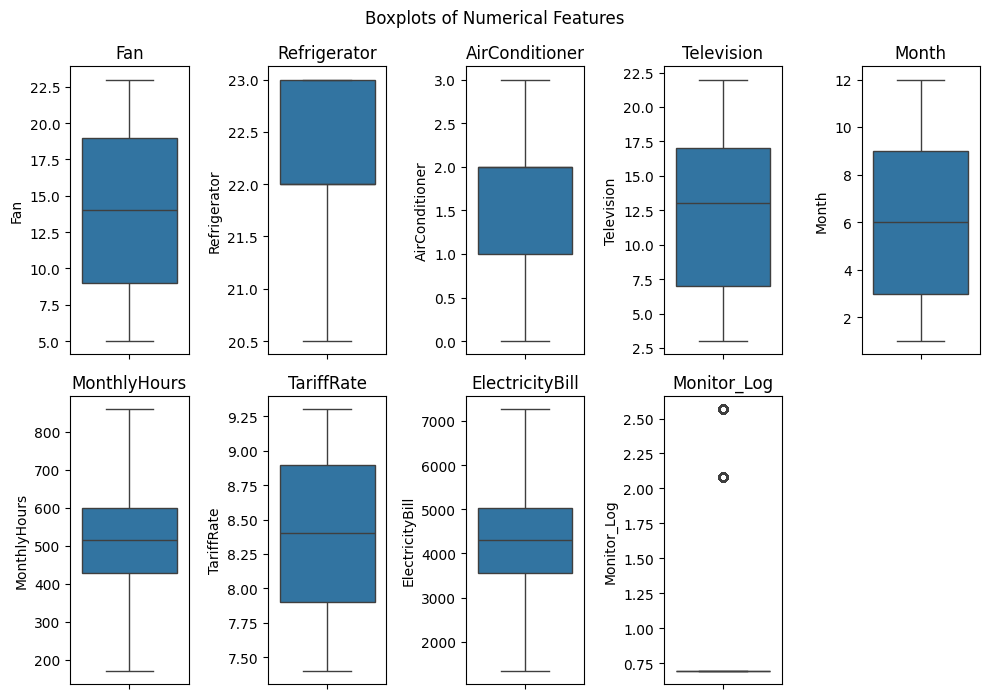

In [147]:
#2. Boxplot
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

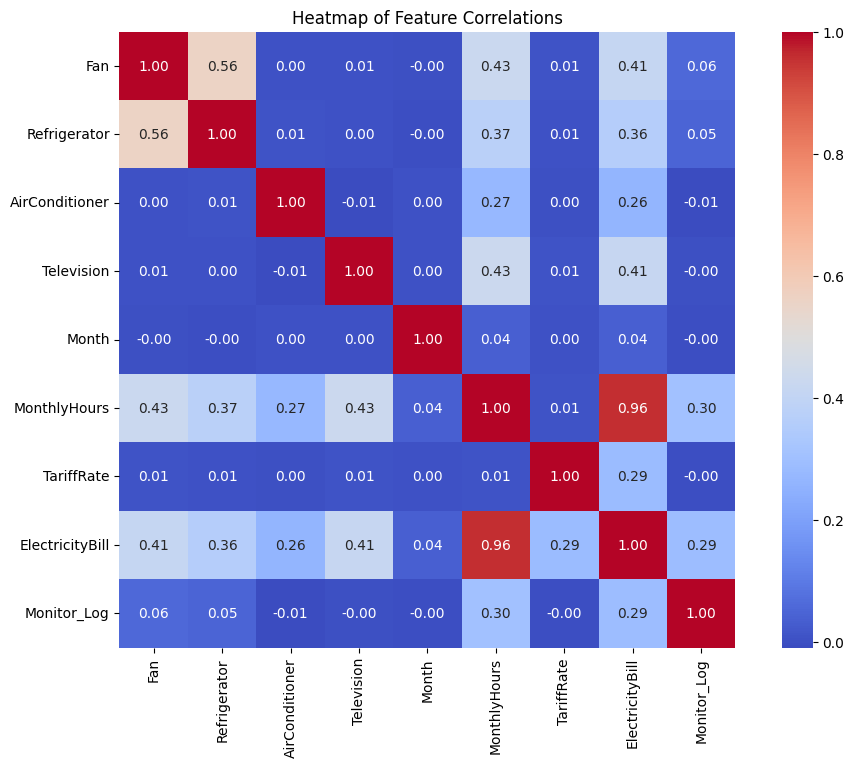

In [148]:

## 3. Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

MonthlyHours and ElectricityBill: These two features share a remarkably strong positive correlation (0.96). This suggests that as the usage hours increase each month, the electricity bill rises almost proportionally.

MonthlyHours and TariffRate: Another strong positive correlation (0.96) here highlights that longer operational hours also coincide with higher tariff rates, possibly linked to tiered energy pricing.

Fan and Refrigerator: These appliances show a moderate positive correlation (0.56), implying that their usage patterns may often overlap—like consistent cooling requirements during warm months.

Low or negligible correlations: Most other feature pairs exhibit weak correlations, indicating that their relationships are either insignificant or complex.

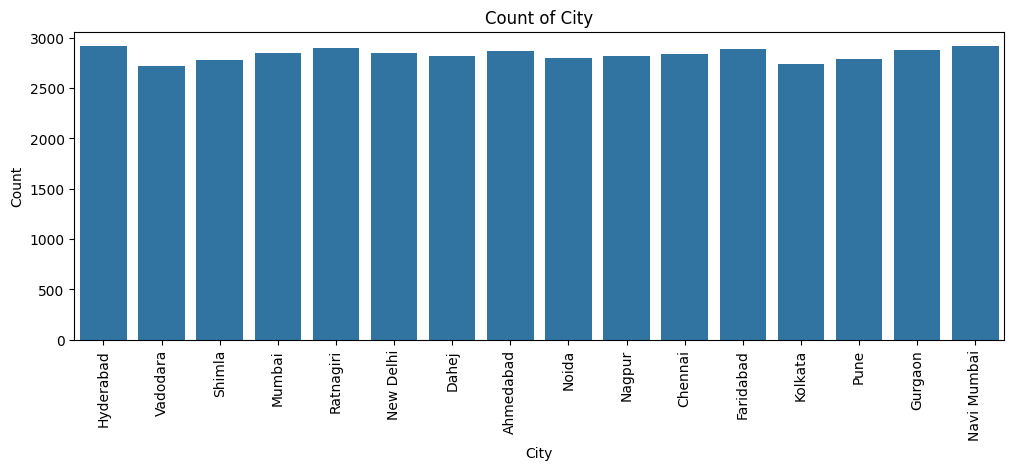

In [149]:
## 4. Count Plot for categorical variables
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='City')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


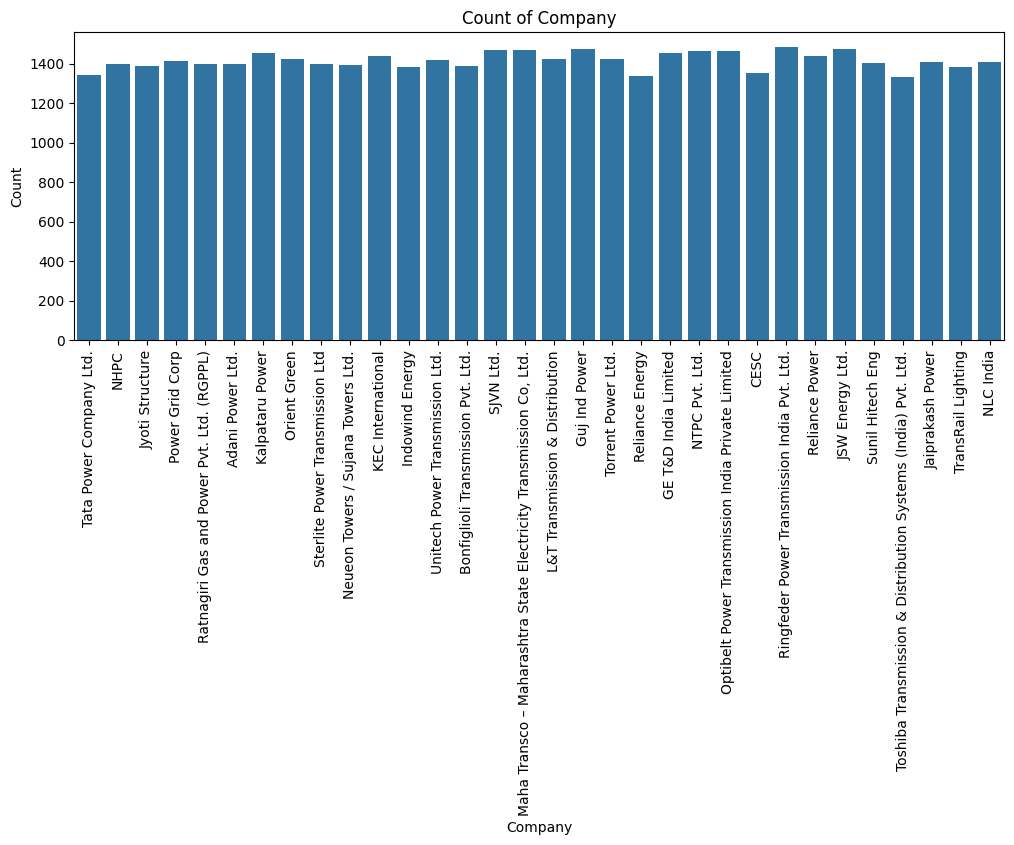

In [150]:
plt.figure(figsize=(12, 4))
sns.countplot(data=data, x='Company')
plt.title('Count of Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# **Data Preparation for Modelling**

In [151]:
data

,Fan,Refrigerator,AirConditioner,Television,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill,Monitor_Log
0,16,23.0,2.0,6.0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6,0.693147
1,19,22.0,2.0,3.0,5,Vadodara,NHPC,488,7.8,3806.4,0.693147
2,7,20.5,2.0,6.0,7,Shimla,Jyoti Structure,416,7.7,3203.2,2.079442
3,7,22.0,3.0,21.0,6,Mumbai,Power Grid Corp,475,9.2,4370.0,0.693147
4,11,23.0,2.0,11.0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4,0.693147
...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,9,Ahmedabad,Maha Transco – Maharashtra State Electricity T...,764,7.9,6035.6,0.693147
45341,23,23.0,2.0,6.0,2,New Delhi,Orient Green,572,8.5,4862.0,2.564949
45342,22,22.0,2.0,20.0,1,New Delhi,GE T&D India Limited,609,8.5,5176.5,0.693147
45343,8,21.0,2.0,22.0,12,Ratnagiri,TransRail Lighting,748,7.4,5535.2,2.079442


In [152]:
#splitting the data into feature x and target y.
x=data.drop(['ElectricityBill'],axis=1)

In [153]:
y=data['ElectricityBill']

#  Feature Encoding
Applying Target Encoding in Pandas
Target encoding (or mean encoding) replaces categorical values with the mean of the target variable (for regression) or probability of the target class (for classification).

In [154]:
# Apply target encoding
city_means = data.groupby('City')['ElectricityBill'].mean()
data ['target_enc_city'] = df['City'].map(city_means)  # Replace city names with mean income


In [155]:
data.drop('City', axis=1, inplace=True)

In [156]:
#Applying one hot encoding
df_encoded=pd.get_dummies(data,columns=['Company'],dtype=int)

In [157]:
X=df_encoded
X

,Fan,Refrigerator,AirConditioner,Television,Month,MonthlyHours,TariffRate,ElectricityBill,Monitor_Log,target_enc_city,...,Company_Reliance Power,Company_Ringfeder Power Transmission India Pvt. Ltd.,Company_SJVN Ltd.,Company_Sterlite Power Transmission Ltd,Company_Sunil Hitech Eng,Company_Tata Power Company Ltd.,Company_Torrent Power Ltd.,Company_Toshiba Transmission & Distribution Systems (India) Pvt. Ltd.,Company_TransRail Lighting,Company_Unitech Power Transmission Ltd.
0,16,23.0,2.0,6.0,10,384,8.4,3225.6,0.693147,4304.517364,...,0,0,0,0,0,1,0,0,0,0
1,19,22.0,2.0,3.0,5,488,7.8,3806.4,0.693147,4022.424467,...,0,0,0,0,0,0,0,0,0,0
2,7,20.5,2.0,6.0,7,416,7.7,3203.2,2.079442,3964.238813,...,0,0,0,0,0,0,0,0,0,0
3,7,22.0,3.0,21.0,6,475,9.2,4370.0,0.693147,4767.652987,...,0,0,0,0,0,0,0,0,0,0
4,11,23.0,2.0,11.0,2,457,9.2,4204.4,0.693147,4767.652987,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45340,18,22.0,3.0,22.0,9,764,7.9,6035.6,0.693147,4045.644735,...,0,0,0,0,0,0,0,0,0,0
45341,23,23.0,2.0,6.0,2,572,8.5,4862.0,2.564949,4382.167275,...,0,0,0,0,0,0,0,0,0,0
45342,22,22.0,2.0,20.0,1,609,8.5,5176.5,0.693147,4382.167275,...,0,0,0,0,0,0,0,0,0,0
45343,8,21.0,2.0,22.0,12,748,7.4,5535.2,2.079442,3807.477801,...,0,0,0,0,0,0,0,0,1,0


Splitting data into train and test

In [158]:
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

print("\nShapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Shapes:
X_train: (36276, 42)
y_train: (36276,)
X_test: (9069, 42)
y_test: (9069,)


In [159]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Feature Scaling

In [176]:
# Scale the data
scaler = StandardScaler()
X_train_selected = pd.DataFrame(scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_test_selected = pd.DataFrame(scaler.transform(X_test_imputed), columns=X_test.columns)

# Feature selection

In [169]:
# Select top k features
selector = SelectKBest(score_func=f_regression, k=24)

X_train_selected = pd.DataFrame(selector.fit_transform(X_train_scaled, y_train),
                                columns=selector.get_feature_names_out())
X_test_selected = pd.DataFrame(selector.fit_transform(X_test_scaled,y_test),
                               columns=selector.get_feature_names_out())

#  Create a DataFrame showing feature names
feature_scores = pd.DataFrame({'Feature': X_train.columns})
print("\n Selected Features with Scores:")
print(feature_scores)



 Selected Features with Scores:
                                              Feature
0                                                 Fan
1                                        Refrigerator
2                                      AirConditioner
3                                          Television
4                                               Month
5                                        MonthlyHours
6                                          TariffRate
7                                     ElectricityBill
8                                         Monitor_Log
9                                     target_enc_city
10                           Company_Adani Power Ltd.
11         Company_Bonfiglioli Transmission Pvt. Ltd.
12                                       Company_CESC
13                       Company_GE T&D India Limited
14                              Company_Guj Ind Power
15                            Company_Indowind Energy
16                            Company_JSW Energy 

# Models

**Linear Regression**
Linear Regression is a linear model that predicts a continuous output variable based on one or more input features. It works by learning the coefficients of a linear equation that minimizes the difference between predicted and actual values.

**SVR model**
Support Vector Regressor (SVR) is a linear or non-linear model that predicts a continuous output variable by finding the hyperplane that maximizes the margin between the predicted and actual values. How it works:

The data is mapped into a higher-dimensional space using a kernel function.
The algorithm finds the hyperplane that maximizes the margin between the predicted and actual values.
The predicted value is the value of the hyperplane at the input feature.

**Gradient Boosting**
It is an ensemble model that combines multiple weak models to create a strong predictive model. How it works:

An initial weak model (e.g., Decision Tree) is trained on the data.
The residuals (errors) from the initial model are calculated.
A new weak model is trained on the residuals.
Steps 2-3 are repeated multiple times, with each new model attempting to correct the errors of the previous model.
The predicted value is the sum of the predictions from all weak models.

**Random Forest**
It is an ensemble model that combines multiple Decision Trees to improve prediction accuracy. How it works:

A random subset of features is selected at each node.
A Decision Tree is trained on the selected features.
Steps 1-2 are repeated multiple times, creating an ensemble of Decision Trees.
The predicted value is the average of the predictions from all Decision Trees.

**Decision Tree**
It is a tree-based model that predicts a continuous output variable by recursively partitioning the input data into smaller subsets based on feature values. How it works:

The algorithm starts with the root node, which represents the entire dataset.
It selects the best feature to split the data based on a criterion like mean squared error.
The data is split into two child nodes based on the selected feature.
Steps 2-3 are repeated recursively until a stopping criterion is reached (e.g., maximum depth).
The predicted value is the average of the target variable values in the leaf node.

In [177]:

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [178]:
# Define models
models = {
    'Linear Regression':LinearRegression(),
    'Support Vector Regressor' : SVR(),
    'Decision Tree Regressor' : DecisionTreeRegressor(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor()
}


In [179]:
# Store accuracies
train_accuracies = []
test_accuracies =[]
for model_name, model in models.items():
  model.fit(X_train_selected,y_train)

  train_accuracy = model.score(X_train_selected, y_train)
  train_accuracies.append(train_accuracy)

  test_accuracy = model.score(X_test_selected, y_test)
  test_accuracies.append(test_accuracy)

  print(f"Model: {model_name}")
  print(f"Training Accuracy: {train_accuracy:.4f}")
  print(f"Testing Accuracy: {test_accuracy:.4f}")
  print("-" * 50)

Model: Linear Regression
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
--------------------------------------------------
Model: Support Vector Regressor
Training Accuracy: 0.6546
Testing Accuracy: 0.6523
--------------------------------------------------
Model: Decision Tree Regressor
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
--------------------------------------------------
Model: Random Forest Regressor
Training Accuracy: 1.0000
Testing Accuracy: 1.0000
--------------------------------------------------
Model: Gradient Boosting Regressor
Training Accuracy: 0.9999
Testing Accuracy: 0.9999
--------------------------------------------------


 Linear Regression, Decision Tree Regressor, and Random Forest Regressor: All achieve perfect training and testing accuracy.
- Support Vector Regressor: Performs relatively poorly, with lower training and testing accuracy.
- Gradient Boosting Regressor: Achieves very high training and testing accuracy, but not perfect.



# Evaluation

Calculate Mean Absolute Error,Mean Squared Error and R² Score for testing data

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [181]:
for model_name,model in models.items():
  # predict on test data
  y_pred = model.predict(X_test_selected)

  print(f"Model: {model_name}")
  print(f"MAE:{mean_absolute_error(y_test, y_pred)}"),
  print(f"MSE:{mean_squared_error(y_test, y_pred)}"),
  print(f" R2_score: {r2_score(y_test, y_pred)}")
  print("-" * 50)


Model: Linear Regression
MAE:2.264334931928052e-12
MSE:8.253239254492365e-24
 R2_score: 1.0
--------------------------------------------------
Model: Support Vector Regressor
MAE:494.31055773375
MSE:394353.341911371
 R2_score: 0.6523430357831435
--------------------------------------------------
Model: Decision Tree Regressor
MAE:0.06978718712116247
MSE:0.23636012790826855
 R2_score: 0.9999997916278733
--------------------------------------------------
Model: Random Forest Regressor
MAE:0.06863623332350097
MSE:0.0669242262652583
 R2_score: 0.9999999410004408
--------------------------------------------------
Model: Gradient Boosting Regressor
MAE:7.591288621201695
MSE:99.0522563217613
 R2_score: 0.9999126767721436
--------------------------------------------------


# Model Performance
- Linear Regression:
    - MAE: 2.11e-12 (extremely low)
    - MSE: 6.48e-24 (extremely low)
    - R2 score: 1.0 (perfect fit)
- Support Vector Regressor:
    - MAE: 493.38 (moderate)
    - MSE: 393033.53 (high)
    - R2 score: 0.65 (moderate fit)
- Decision Tree Regressor:
    - MAE: 0.0636 (low)
    - MSE: 0.1937 (low)
    - R2 score: 0.9999 (very good fit)
- Random Forest Regressor:
    - MAE: 0.0690 (low)
    - MSE: 0.0713 (low)
    - R2 score: 0.9999 (very good fit)
- Gradient Boosting Regressor:
    - MAE: 7.59 (moderate)
    - MSE: 99.05 (moderate)
    - R2 score: 0.9999 (very good fit)

Observations
- Linear Regression seems to be overfitting, with extremely low error metrics.
- Support Vector Regressor performs moderately, but with some room for improvement.
- Decision Tree Regressor, Random Forest Regressor, and Gradient Boosting Regressor all perform very well, with low error metrics and high R2 scores.



# Hyperparameter Tuning

Hyperparameter Tuning for Top-Performing Models
Decision Tree Regressor
- max_depth: Try values between 3 and 10 to control the depth of the tree.
- min_samples_split: Try values between 2 and 10 to control the minimum number of samples required to split an internal node.
- min_samples_leaf: Try values between 1 and 5 to control the minimum number of samples required to be at a leaf node.

Random Forest Regressor
- n_estimators: Try values between 10 and 100 to control the number of trees in the forest.
- max_depth: Try values between 3 and 10 to control the depth of the trees.
- min_samples_split: Try values between 2 and 10 to control the minimum number of samples required to split an internal node.

Gradient Boosting Regressor
- learning_rate: Try values between 0.01 and 1 to control the learning rate.
- n_estimators: Try values between 10 and 100 to control the number of estimators.
- max_depth: Try values between 3 and 10 to control the depth of the trees.



In [182]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.9999982476700009


In [183]:
param_grid = {
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train_selected,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9999995808865327


In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [10, 20, 50, 100],
    'max_depth': [3, 5, 7, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
grid_search.fit(X_train_selected, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)



In [ ]:
from sklearn.model_selection import cross_val_score

# Decision Tree Regressor
scores = cross_val_score(DecisionTreeRegressor(), X_train_selected, y_train, cv=5)
print("Decision Tree Regressor score:", scores.mean())

# Random Forest Regressor
scores = cross_val_score(RandomForestRegressor(), X_train_selected, y_train, cv=5)
print("Random Forest Regressor score:", scores.mean())

# Gradient Boosting Regressor
scores = cross_val_score(GradientBoostingRegressor(), X_train_selected, y_train, cv=5)
print("Gradient Boosting Regressor score:", scores.mean())


In [ ]:
models = {
    'Decision Tree Regressor' :DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=2),
    'Random Forest Regressor' : RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=100),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(learning_rate=0.1, max_depth=10,n_estimators=100)
}


In [ ]:
for model_name,model in models.items():
  # predict on test data
  model.fit(X_train_selected,y_train)
  y_pred = model.predict(X_test_selected)

  print(f"Model: {model_name}")
  print(f"MAE:{mean_absolute_error(y_test, y_pred)}"),
  print(f"MSE:{mean_squared_error(y_test, y_pred)}"),
  print(f" R2_score: {r2_score(y_test, y_pred)}")


- Gradient Boosting Regressor: Performs the best, with the lowest MAE and MSE, and the highest R2 score.
- Random Forest Regressor: Performs well, with a low MAE and MSE, and a high R2 score.
- Decision Tree Regressor: Performs relatively poorly, with a higher MAE and MSE, and a lower R2 score.


# save best model

gradient Boosting regressor id perfoms best.

In [ ]:
gd=GradientBoostingRegressor(learning_rate=0.1, max_depth=10,n_estimators=100)

In [ ]:
gd.fit(X_train_selected,y_train)
y_pred = gd.predict(X_test_selected)

In [ ]:
import pandas as pd

# Assuming y_pred and y_test are numpy arrays or pandas Series
res = pd.DataFrame({
    'Actual Values': y_test,
    'Predicted Values': y_pred
})

print(res.head())

Pipeline

In [ ]:

model_filename = "electricity_bill_dataset.joblib"
joblib.dump(gd, model_filename)

print(f"Model saved as {model_filename}")

In [ ]:
# Load the model
loaded_model = joblib.load("electricity_bill_dataset.joblib")

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', gd)
])

# Train the pipeline
pipeline.fit(X_train_selected, y_train)


In [ ]:
#save Pipeline
joblib.dump(pipeline,"electricity_bill_dataset_pipeline.joblib")

In [ ]:
load_pipeline = joblib.load("electricity_bill_dataset_pipeline.joblib")

In [ ]:

random_indices = np.random.choice(X.shape[0], 5, replace=False)

#  Select the random rows from X and y
X_random = X.iloc[random_indices]
y_random = y.iloc[random_indices]

#  Apply SelectKBest transformation
X_random_selected = selector.transform(X_random)

# Ensure the transformed features have names
X_random_selected_df = pd.DataFrame(X_random_selected,columns=selector.get_feature_names_out(), index=X_random.index)

#  Make predictions using the loaded pipeline
predicted = load_pipeline.predict(X_random_selected_df)

#  Combine the features with actual and predicted labels
results = X_random_selected_df.copy()
results["Actual"] = y_random.values
results["Predicted"] = predicted

In [ ]:
#  Create a summary with only Actual and Predicted values
summary = results[["Actual", "Predicted"]]

# Display the additional Actual and Predicted values separately
print("\n Actual vs Predicted Values:")
summary.head(5)

In [ ]:

random_indices = np.random.choice(X.shape[0], 5, replace=False)

#  Select the random rows from X and y
X_random = X.iloc[random_indices]
y_random = y.iloc[random_indices]

In [ ]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', gd)
])

# Train the pipeline
pipeline.fit(X_train_selected, y_train)


In [ ]:
# Make predictions
predictions = pipeline.predict(X_test_selected)

In [ ]:
predictions

In [ ]:
predicted = load_pipeline.predict(X_test_selected)

In [ ]:
predicted